In [4]:
import kneed
import numpy as np
import pandas as pd
import sklearn.preprocessing
from matplotlib import pyplot as plt
from sklearn import cluster

In [5]:
data = pd.read_csv('Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
cleaned_gdp_data = data[data.gdpp < data.gdpp.quantile(0.9)]
cleaned_gdp_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
columns = {
    'child_mort': False,
    'exports': True,
    'health': True,
    'imports': True,
    'inflation': False,
    'life_expec': True,
    'total_fer': True,
    'gdpp': True
}
gdp_without_country = cleaned_gdp_data.drop(["country"], axis=1)
scaler = sklearn.preprocessing.MinMaxScaler()
gdp_data_normalized = scaler.fit_transform(gdp_without_country)
gdp_data_normalized = pd.DataFrame(gdp_data_normalized, columns=gdp_without_country.columns,
                                   index=gdp_without_country.index)
for column in columns:
    if not columns[column]:
        gdp_data_normalized[column] = gdp_data_normalized[column].apply(lambda x: 1 - x)

gdp_data_normalized

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.575195,0.064693,0.458708,0.291255,0.012514,0.873856,0.483936,0.733227,0.007746
1,0.934570,0.182424,0.374489,0.315291,0.116526,0.919601,0.887550,0.067093,0.092834
2,0.882324,0.250446,0.179886,0.203555,0.153655,0.812309,0.891566,0.265176,0.101734
3,0.434570,0.406767,0.071954,0.278263,0.066145,0.754089,0.562249,0.787540,0.079362
4,0.965332,0.296885,0.331971,0.382203,0.231164,0.947787,0.897590,0.143770,0.287931
...,...,...,...,...,...,...,...,...,...
162,0.873047,0.304079,0.268193,0.341926,0.029266,0.936882,0.620482,0.362620,0.065890
163,0.932129,0.185694,0.240392,0.113907,0.198660,0.536919,0.869478,0.198083,0.319204
164,0.901855,0.470211,0.398201,0.520574,0.048518,0.849275,0.823293,0.115016,0.025957
165,0.740723,0.195505,0.262469,0.223044,0.048393,0.743000,0.710843,0.549521,0.025957


In [11]:
income_gdpp = gdp_data_normalized[["income", "gdpp", "child_mort"]]
income_gdpp

,income,gdpp,child_mort
0,0.012514,0.007746,0.575195
1,0.116526,0.092834,0.934570
2,0.153655,0.101734,0.882324
3,0.066145,0.079362,0.434570
4,0.231164,0.287931,0.965332
...,...,...,...
162,0.029266,0.065890,0.873047
163,0.198660,0.319204,0.932129
164,0.048518,0.025957,0.901855
165,0.048393,0.025957,0.740723


/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_29634/3207643669.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_29634/3207643669.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_29634/3207643669.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/var/folders/h5/0sm7xyj948950qwc8qlp4sbc0000gn/T/ipykernel_29634/3207643669.py:5: 

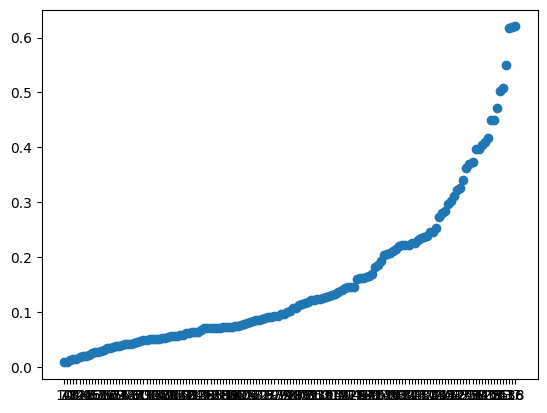

In [12]:
income_gdpp_sorted = income_gdpp.sort_values(by=["income", "gdpp"])
distance_df = pd.DataFrame(columns=["index", "distance"])
for i in range(0, len(income_gdpp_sorted) - 1):
    dist = np.linalg.norm(income_gdpp_sorted.iloc[i] - income_gdpp_sorted.iloc[i + 1])
    distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
distance_df = distance_df.sort_values(by=["distance"])
plt.scatter(distance_df["index"], distance_df["distance"])
plt.show()

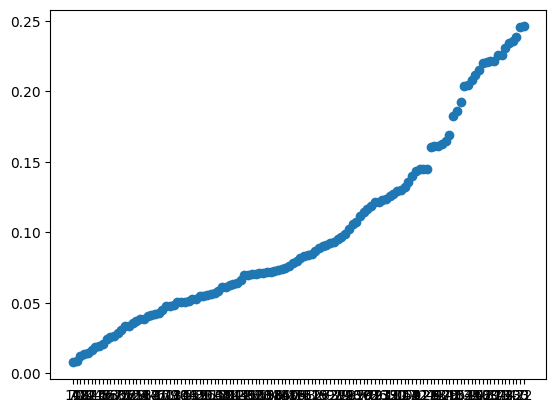

In [13]:
distance_df2 = distance_df[distance_df['distance'] < 0.25]
distance_df2 = distance_df2.sort_values(by=["distance"])
plt.scatter(distance_df2["index"], distance_df2["distance"])
plt.show()

In [14]:
range_eps = (0.05 + x * 0.05 for x in range(5))
for i in range_eps:
    db = sklearn.cluster.DBSCAN(eps=i, min_samples=5).fit(income_gdpp)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhoutte_avg = sklearn.metrics.silhouette_score(income_gdpp, labels)
    print(f"For eps={i} average silhouette score is {silhoutte_avg}")

{0, 1, -1}
For eps=0.05 average silhouette score is 0.14922535377001536
{0, 1, -1}
For eps=0.1 average silhouette score is 0.4862984974249521
{0, -1}
For eps=0.15000000000000002 average silhouette score is 0.5221799927431342
{0, -1}
For eps=0.2 average silhouette score is 0.5654919347762092
{0, -1}
For eps=0.25 average silhouette score is 0.5593605728786667


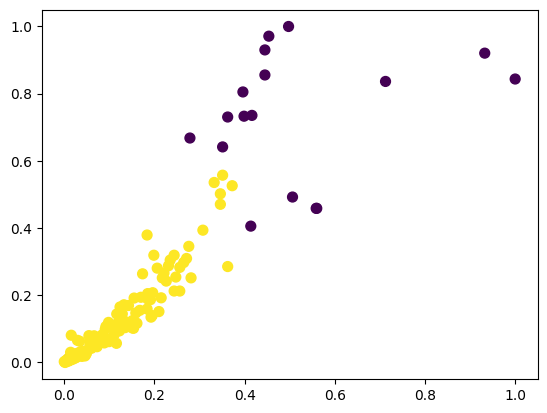

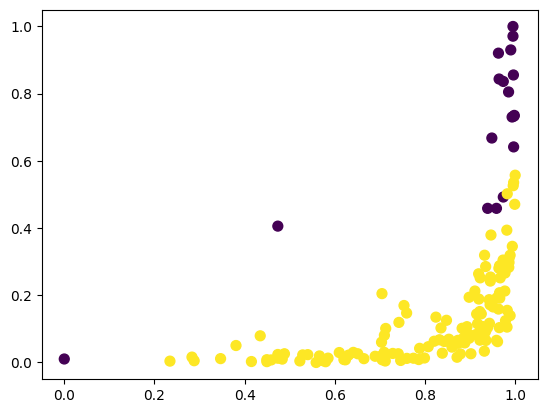

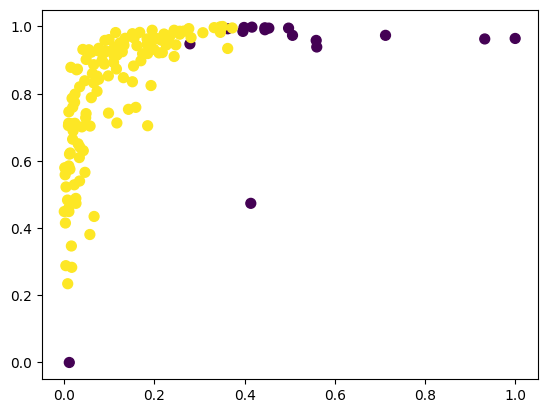

In [15]:
data_dbscan = sklearn.cluster.DBSCAN(eps=0.2, min_samples=20).fit_predict(income_gdpp)
plt.scatter(income_gdpp["income"], income_gdpp["gdpp"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income_gdpp["child_mort"], income_gdpp["gdpp"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income_gdpp["income"], income_gdpp["child_mort"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()

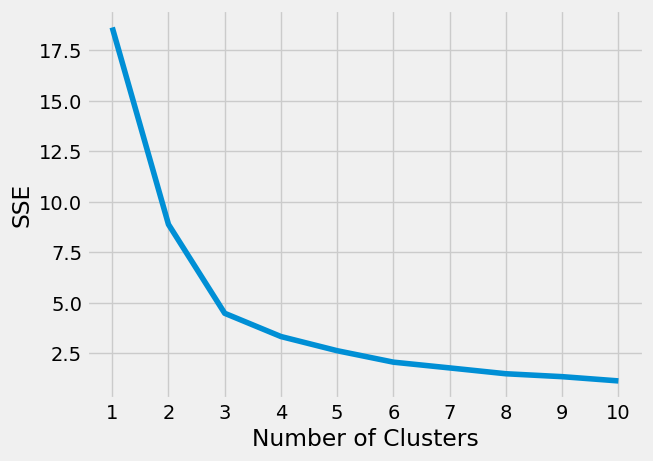

In [16]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(income_gdpp)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [17]:
kl = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
clusters_num = kl.elbow
clusters_num

3

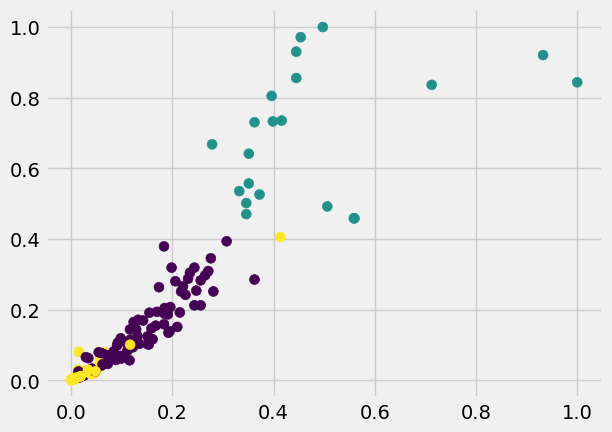

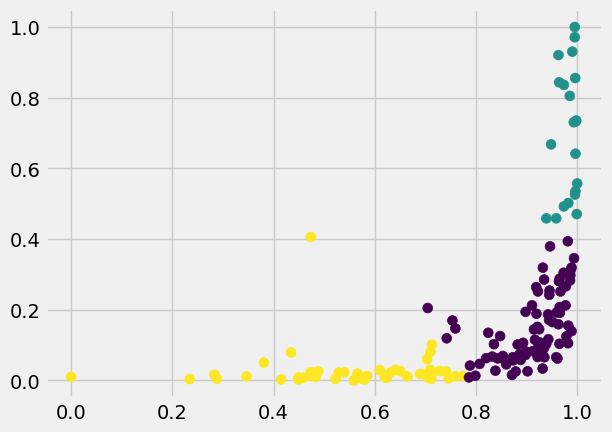

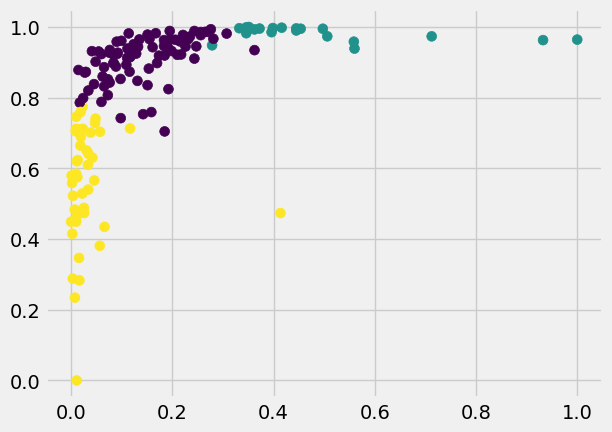

In [18]:
gdp_kmeans_labels = cluster.KMeans(clusters_num).fit_predict(income_gdpp)
plt.scatter(income_gdpp["income"], income_gdpp["gdpp"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income_gdpp["child_mort"], income_gdpp["gdpp"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income_gdpp["income"], income_gdpp["child_mort"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()

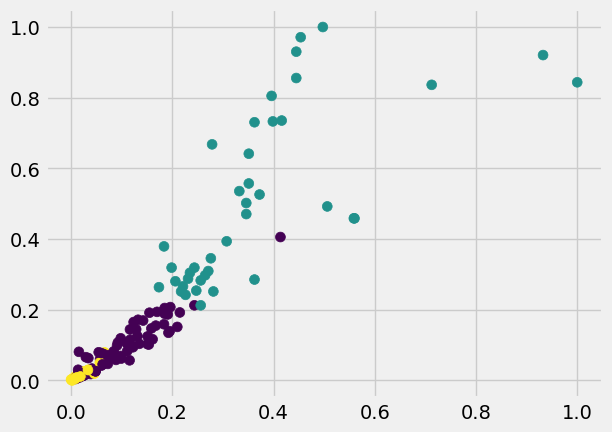

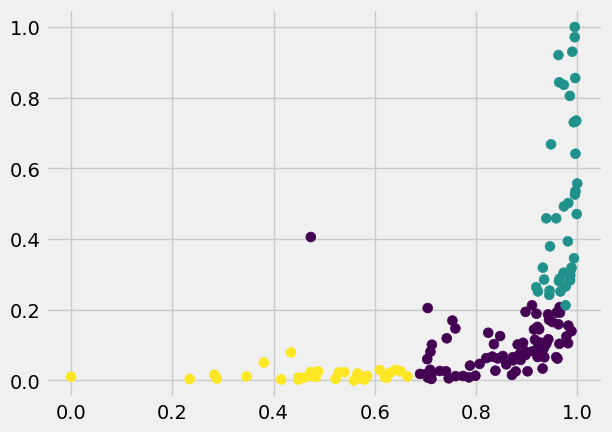

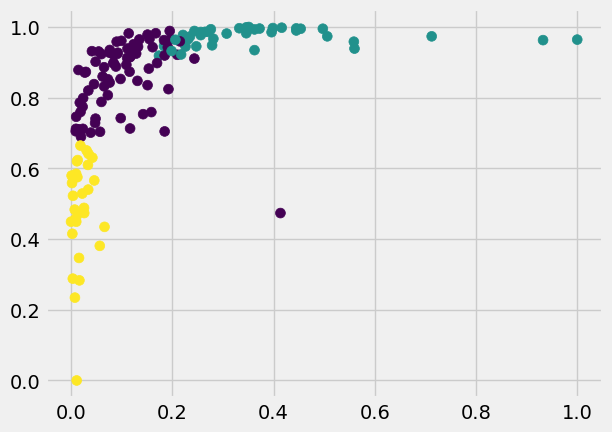

In [19]:
gdp_spectral_labels = cluster.SpectralClustering(n_clusters=clusters_num, affinity="nearest_neighbors", assign_labels="kmeans").fit_predict(income_gdpp)
plt.scatter(income_gdpp["income"], income_gdpp["gdpp"], c=gdp_spectral_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income_gdpp["child_mort"], income_gdpp["gdpp"], c=gdp_spectral_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income_gdpp["income"], income_gdpp["child_mort"], c=gdp_spectral_labels,
            s=50, cmap='viridis')
plt.show()

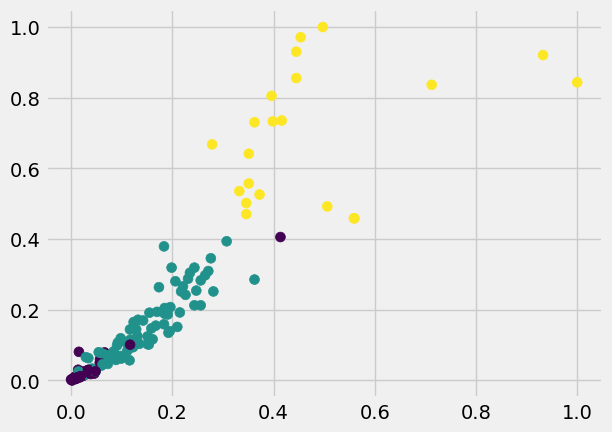

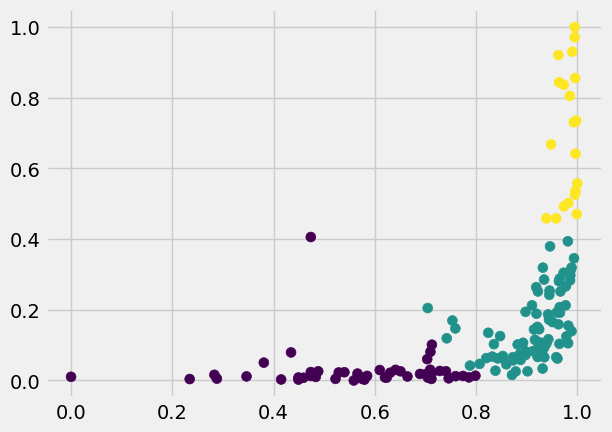

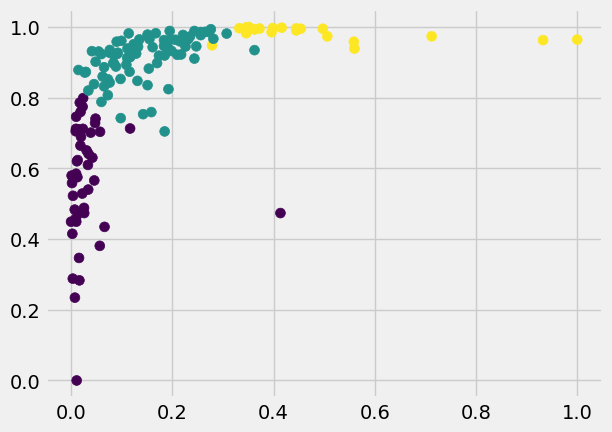

In [20]:
gdp_mini_kmeans_labels = cluster.MiniBatchKMeans(clusters_num).fit_predict(income_gdpp)
plt.scatter(income_gdpp["income"], income_gdpp["gdpp"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income_gdpp["child_mort"], income_gdpp["gdpp"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(income_gdpp["income"], income_gdpp["child_mort"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')
plt.show()